In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

API_KEY = os.getenv('API_KEY')

In [6]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
    'start':'1',
    'limit':'5000',
    'convert':'USD'
}

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    # print(json.dumps(data, indent=4))
    # print(data)
    
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [7]:
type(data)

dict

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [9]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12328,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991458e+07,19914584,False,NaN,1,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,1.097393e+05,5.834620e+10,34.4728,0.158381,0.613830,-1.596265,-3.555335,0.045437,4.312832,2.185412e+12,57.3712,2.304525e+12,NaN,2025-09-01T09:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
1,1027,Ethereum,ETH,ethereum,10498,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207066e+08,120706552.568875,True,NaN,2,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,4.480113e+03,3.078853e+10,40.4077,0.125720,0.153752,-2.664095,28.004807,72.437232,71.846646,5.407790e+11,14.1965,5.407790e+11,NaN,2025-09-01T09:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
2,52,XRP,XRP,xrp,1694,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,99985819185,False,NaN,3,NaN,NaN,NaN,2025-09-01T09:17:00.000Z,2.830252e+00,5.995525e+09,83.5823,1.021842,-0.317566,-3.769369,-4.822619,23.995133,29.119723,1.683498e+11,4.4156,2.830252e+11,NaN,2025-09-01T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
3,825,Tether USDt,USDT,tether,144572,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.680075e+11,172732955315.635284,True,NaN,4,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,1.000255e+00,9.933755e+10,38.8079,-0.027492,0.018495,0.054520,0.057677,-0.009127,-0.013848,1.680503e+11,4.4116,1.727770e+11,NaN,2025-09-01T09:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-01 12:19:24.648149
4,1839,BNB,BNB,bnb,2695,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391878e+08,139187784.26,False,NaN,5,NaN,NaN,NaN,2025-09-01T09:17:00.000Z,8.630609e+02,2.249408e+09,29.4879,-0.238181,0.236000,0.405024,14.246961,30.280933,29.625213,1.201275e+11,3.1507,1.201275e+11,NaN,2025-09-01T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2994,Bitcoin File,BIFI,bitcoin-file,4,2018-07-28T00:00:00.000Z,[],NaN,0.000000e+00,21050000000,False,NaN,4996,NaN,NaN,NaN,2025-09-01T09:17:00.000Z,2.537299e-04,1.178950e+04,-33.3430,0.005804,-1.689163,17.621085,26.462522,6.576407,17.639075,0.000000e+00,0.0000,5.341014e+06,NaN,2025-09-01T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
4996,38205,Nobody Sausage,NOBODY,nobody-sausage-ethereum,1,2025-08-26T17:47:42.000Z,"[memes, ethereum-ecosystem]",4.200000e+17,0.000000e+00,420000000000000000,False,NaN,4997,4.200000e+17,3.675773e+05,NaN,2025-09-01T09:17:00.000Z,8.751840e-13,1.172070e+04,-60.0219,2.999328,-12.590641,102.077404,102.077404,102.077404,102.077404,0.000000e+00,0.0000,3.675773e+05,NaN,2025-09-01T09:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2d40847616eb0e65222c06eae13626323d90a7b3,2025-09-01 12:19:24.648149
4997,25015,FART COIN,FRTC,fart-coin,9,2023-05-07T00:24:11.000Z,"[memes, bnb-chain-ecosystem]",1.000000e+14,0.000000e+00,100000000000000,False,NaN,4998,1.000000e+14,1.491770e+07,NaN,2025-09-01T09:17:00.000Z,1.491770e-07,1.169198e+04,55.1975,0.158832,-0.088286,0.559372,0.752271,-0.621852,-0.525631,0.000000e+00,0.0000,1.491770e+07,NaN,20

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
        'start':'1',
        'limit':'5000',
        'convert':'USD'
    }

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': API_KEY,
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df,df2], ignore_index=True)
    
    if not os.path.isfile('crypto_data.csv'):
        df.to_csv('crypto_data.csv', index=False, header=True)
    else:
        df.to_csv('crypto_data.csv', index=False, header=False, mode='a')

In [14]:
from time import time, sleep

for i in range(333):
    api_runner()
    print("API run complete, waiting 60 seconds")
    sleep(60)
    
exit()

API run complete, waiting 60 seconds
API run complete, waiting 60 seconds


KeyboardInterrupt: 

In [15]:
new_df = pd.read_csv('crypto_data.csv')
new_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12328,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.991458e+07,1.991458e+07,False,NaN,1,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,1.097393e+05,5.834620e+10,34.4728,0.158381,0.613830,-1.596265,-3.555335,0.045437,4.312832,2.185412e+12,57.3712,2.304525e+12,NaN,2025-09-01T09:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
1,1027,Ethereum,ETH,ethereum,10498,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207066e+08,1.207066e+08,True,NaN,2,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,4.480113e+03,3.078853e+10,40.4077,0.125720,0.153752,-2.664095,28.004807,72.437232,71.846646,5.407790e+11,14.1965,5.407790e+11,NaN,2025-09-01T09:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
2,52,XRP,XRP,xrp,1694,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,NaN,2025-09-01T09:17:00.000Z,2.830252e+00,5.995525e+09,83.5823,1.021842,-0.317566,-3.769369,-4.822619,23.995133,29.119723,1.683498e+11,4.4156,2.830252e+11,NaN,2025-09-01T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
3,825,Tether USDt,USDT,tether,144572,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.680075e+11,1.727330e+11,True,NaN,4,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,1.000255e+00,9.933755e+10,38.8079,-0.027492,0.018495,0.054520,0.057677,-0.009127,-0.013848,1.680503e+11,4.4116,1.727770e+11,NaN,2025-09-01T09:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-01 12:19:24.648149
4,1839,BNB,BNB,bnb,2695,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.391878e+08,1.391878e+08,False,NaN,5,NaN,NaN,NaN,2025-09-01T09:17:00.000Z,8.630609e+02,2.249408e+09,29.4879,-0.238181,0.236000,0.405024,14.246961,30.280933,29.625213,1.201275e+11,3.1507,1.201275e+11,NaN,2025-09-01T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2994,Bitcoin File,BIFI,bitcoin-file,4,2018-07-28T00:00:00.000Z,[],NaN,0.000000e+00,2.105000e+10,False,NaN,4996,NaN,NaN,NaN,2025-09-01T09:25:00.000Z,2.537265e-04,1.172841e+04,-33.7274,0.001820,-1.612813,17.593896,26.454717,6.524228,17.682722,0.000000e+00,0.0000,5.340944e+06,NaN,2025-09-01T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:26:22.138589
44996,38205,Nobody Sausage,NOBODY,nobody-sausage-ethereum,1,2025-08-26T17:47:42.000Z,"['memes', 'ethereum-ecosystem']",4.200000e+17,0.000000e+00,4.200000e+17,False,NaN,4997,4.200000e+17,3.675773e+05,NaN,2025-09-01T09:25:00.000Z,8.751840e-13,1.166643e+04,-59.9777,0.121796,-13.035116,102.077404,102.077404,102.077404,102.077404,0.000000e+00,0.0000,3.675773e+05,NaN,2025-09-01T09:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2d40847616eb0e65222c06eae13626323d90a7b3,2025-09-01 12:26:22.138589
44997,37366,Nexus,NEXUS,nexus-bsc,2,2025-07-15T14:25:10.000Z,"['defi', 'smart-contracts', 'bnb-chain-ecosyst...",1.000000e+09,0.000000e+00,1.000000e+09,False,NaN,4998,7.560000e+08,8.800952e+05,NaN,2025-09-01T09:25:00.000Z,1.164147e-03,1.147547e+04,-69.0912,-0.108204,-6.012682,-7.085041,-1.148015,-59.548954,-59.548954,0.000000e+00,0.0000,1.

In [18]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [19]:
new_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12328,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19914584.00000,19914584.00000,False,NaN,1,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,109739.28795,58346202086.13741,34.47280,0.15838,0.61383,-1.59627,-3.55533,0.04544,4.31283,2185412267967.60840,57.37120,2304525046936.43994,NaN,2025-09-01T09:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
1,1027,Ethereum,ETH,ethereum,10498,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120706552.56887,120706552.56887,True,NaN,2,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,4480.11323,30788528614.80146,40.40770,0.12572,0.15375,-2.66410,28.00481,72.43723,71.84665,540779023629.59570,14.19650,540779023629.59998,NaN,2025-09-01T09:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
2,52,XRP,XRP,xrp,1694,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59482264023.00000,99985819185.00000,False,NaN,3,NaN,NaN,NaN,2025-09-01T09:17:00.000Z,2.83025,5995525449.84999,83.58230,1.02184,-0.31757,-3.76937,-4.82262,23.99513,29.11972,168349771411.46155,4.41560,283025157459.32001,NaN,2025-09-01T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
3,825,Tether USDt,USDT,tether,144572,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,168007461104.55231,172732955315.63528,True,NaN,4,NaN,NaN,NaN,2025-09-01T09:16:00.000Z,1.00025,99337548559.10468,38.80790,-0.02749,0.01850,0.05452,0.05768,-0.00913,-0.01385,168050287210.21393,4.41160,172776985978.01001,NaN,2025-09-01T09:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-01 12:19:24.648149
4,1839,BNB,BNB,bnb,2695,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,139187784.26000,139187784.26000,False,NaN,5,NaN,NaN,NaN,2025-09-01T09:17:00.000Z,863.06089,2249407757.14583,29.48790,-0.23818,0.23600,0.40502,14.24696,30.28093,29.62521,120127533536.84116,3.15070,120127533536.84000,NaN,2025-09-01T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:19:24.648149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2994,Bitcoin File,BIFI,bitcoin-file,4,2018-07-28T00:00:00.000Z,[],NaN,0.00000,21050000000.00000,False,NaN,4996,NaN,NaN,NaN,2025-09-01T09:25:00.000Z,0.00025,11728.41166,-33.72740,0.00182,-1.61281,17.59390,26.45472,6.52423,17.68272,0.00000,0.00000,5340943.63000,NaN,2025-09-01T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-01 12:26:22.138589
44996,38205,Nobody Sausage,NOBODY,nobody-sausage-ethereum,1,2025-08-26T17:47:42.000Z,"['memes', 'ethereum-ecosystem']",420000000000000000.00000,0.00000,420000000000000000.00000,False,NaN,4997,420000000000000000.00000,367577.28845,NaN,2025-09-01T09:25:00.000Z,0.00000,11666.43480,-59.97770,0.12180,-13.03512,102.07740,102.07740,102.07740,102.07740,0.00000,0.00000,367577.29000,NaN,2025-09-01T09:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x2d40847616eb0e65222c06eae13626323d90a7b3,2025-09-01 12:26:22.138589
44997,37366,Nexus,NEXUS,nexus-bsc,2,2025-07-15T14:25:10.000Z,"['defi', 'smart-contracts', 'bnb-chain-ecosyst...",1000000000.00000,0.00000,1000000000.00000,False,NaN,4998,756000000.00000,880095.20705,NaN,2025-09-01T09:25:00.000Z,0.00116

In [47]:
grouped_df = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
grouped_df.head(15)

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.12341,0.60330,-1.64513,-3.55034,-0.09459,4.35432
Ethereum,0.15753,0.11222,-2.61468,28.07298,72.26256,71.92449
XRP,0.92801,-0.38695,-3.92332,-4.80780,23.89349,29.03970
Tether USDt,-0.00535,0.00310,0.03961,0.03825,-0.02718,-0.03345
BNB,-0.31209,0.17224,0.31172,14.22626,30.17593,29.54926
Solana,0.17162,-0.86645,2.03689,23.98849,30.43503,27.93246
USDC,0.00435,-0.00246,0.00167,0.00975,-0.00310,0.01225
Dogecoin,1.00854,0.14315,-0.63217,9.68389,25.37055,12.80967
TRON,0.09000,-0.31702,-3.07238,4.48928,20.35866,26.06446


In [49]:
_df = grouped_df.head(15).stack()
_df

name                                 
Bitcoin  quote.USD.percent_change_1h     0.12341
         quote.USD.percent_change_24h    0.60330
         quote.USD.percent_change_7d    -1.64513
         quote.USD.percent_change_30d   -3.55034
         quote.USD.percent_change_60d   -0.09459
                                          ...   
Stellar  quote.USD.percent_change_24h    0.59842
         quote.USD.percent_change_7d    -7.52096
         quote.USD.percent_change_30d   -5.51630
         quote.USD.percent_change_60d   48.52181
         quote.USD.percent_change_90d   34.03251
Length: 90, dtype: float64

In [50]:
type(_df)

pandas.core.series.Series

In [51]:
stacked_df = _df.to_frame(name='values')
stacked_df

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.12341
        quote.USD.percent_change_24h  0.60330
        quote.USD.percent_change_7d  -1.64513
        quote.USD.percent_change_30d -3.55034
        quote.USD.percent_change_60d -0.09459
...                                       ...
Stellar quote.USD.percent_change_24h  0.59842
        quote.USD.percent_change_7d  -7.52096
        quote.USD.percent_change_30d -5.51630
        quote.USD.percent_change_60d 48.52181
        quote.USD.percent_change_90d 34.03251

[90 rows x 1 columns]

In [52]:
stacked_df.reset_index(inplace=True)
stacked_df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.12341
1,Bitcoin,quote.USD.percent_change_24h,0.60330
2,Bitcoin,quote.USD.percent_change_7d,-1.64513
3,Bitcoin,quote.USD.percent_change_30d,-3.55034
4,Bitcoin,quote.USD.percent_change_60d,-0.09459
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,0.59842
86,Stellar,quote.USD.percent_change_7d,-7.52096
87,Stellar,quote.USD.percent_change_30d,-5.51630
88,Stellar,quote.USD.percent_change_60d,48.52181


In [53]:
stacked_df.rename(columns={'level_1':'percent_change'}, inplace=True)
stacked_df

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.12341
1,Bitcoin,quote.USD.percent_change_24h,0.60330
2,Bitcoin,quote.USD.percent_change_7d,-1.64513
3,Bitcoin,quote.USD.percent_change_30d,-3.55034
4,Bitcoin,quote.USD.percent_change_60d,-0.09459
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,0.59842
86,Stellar,quote.USD.percent_change_7d,-7.52096
87,Stellar,quote.USD.percent_change_30d,-5.51630
88,Stellar,quote.USD.percent_change_60d,48.52181


In [57]:
stacked_df['percent_change'].replace({'quote.USD.percent_change_1h':'1 Hour', 'quote.USD.percent_change_24h':'24 Hours', 'quote.USD.percent_change_7d':'7 Days', 'quote.USD.percent_change_30d':'30 Days', 'quote.USD.percent_change_60d':'60 Days', 'quote.USD.percent_change_90d':'90 Days'}, inplace=True)
stacked_df

,name,percent_change,values
0,Bitcoin,1 Hour,0.12341
1,Bitcoin,24 Hours,0.60330
2,Bitcoin,7 Days,-1.64513
3,Bitcoin,30 Days,-3.55034
4,Bitcoin,60 Days,-0.09459
...,...,...,...
85,Stellar,24 Hours,0.59842
86,Stellar,7 Days,-7.52096
87,Stellar,30 Days,-5.51630
88,Stellar,60 Days,48.52181


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

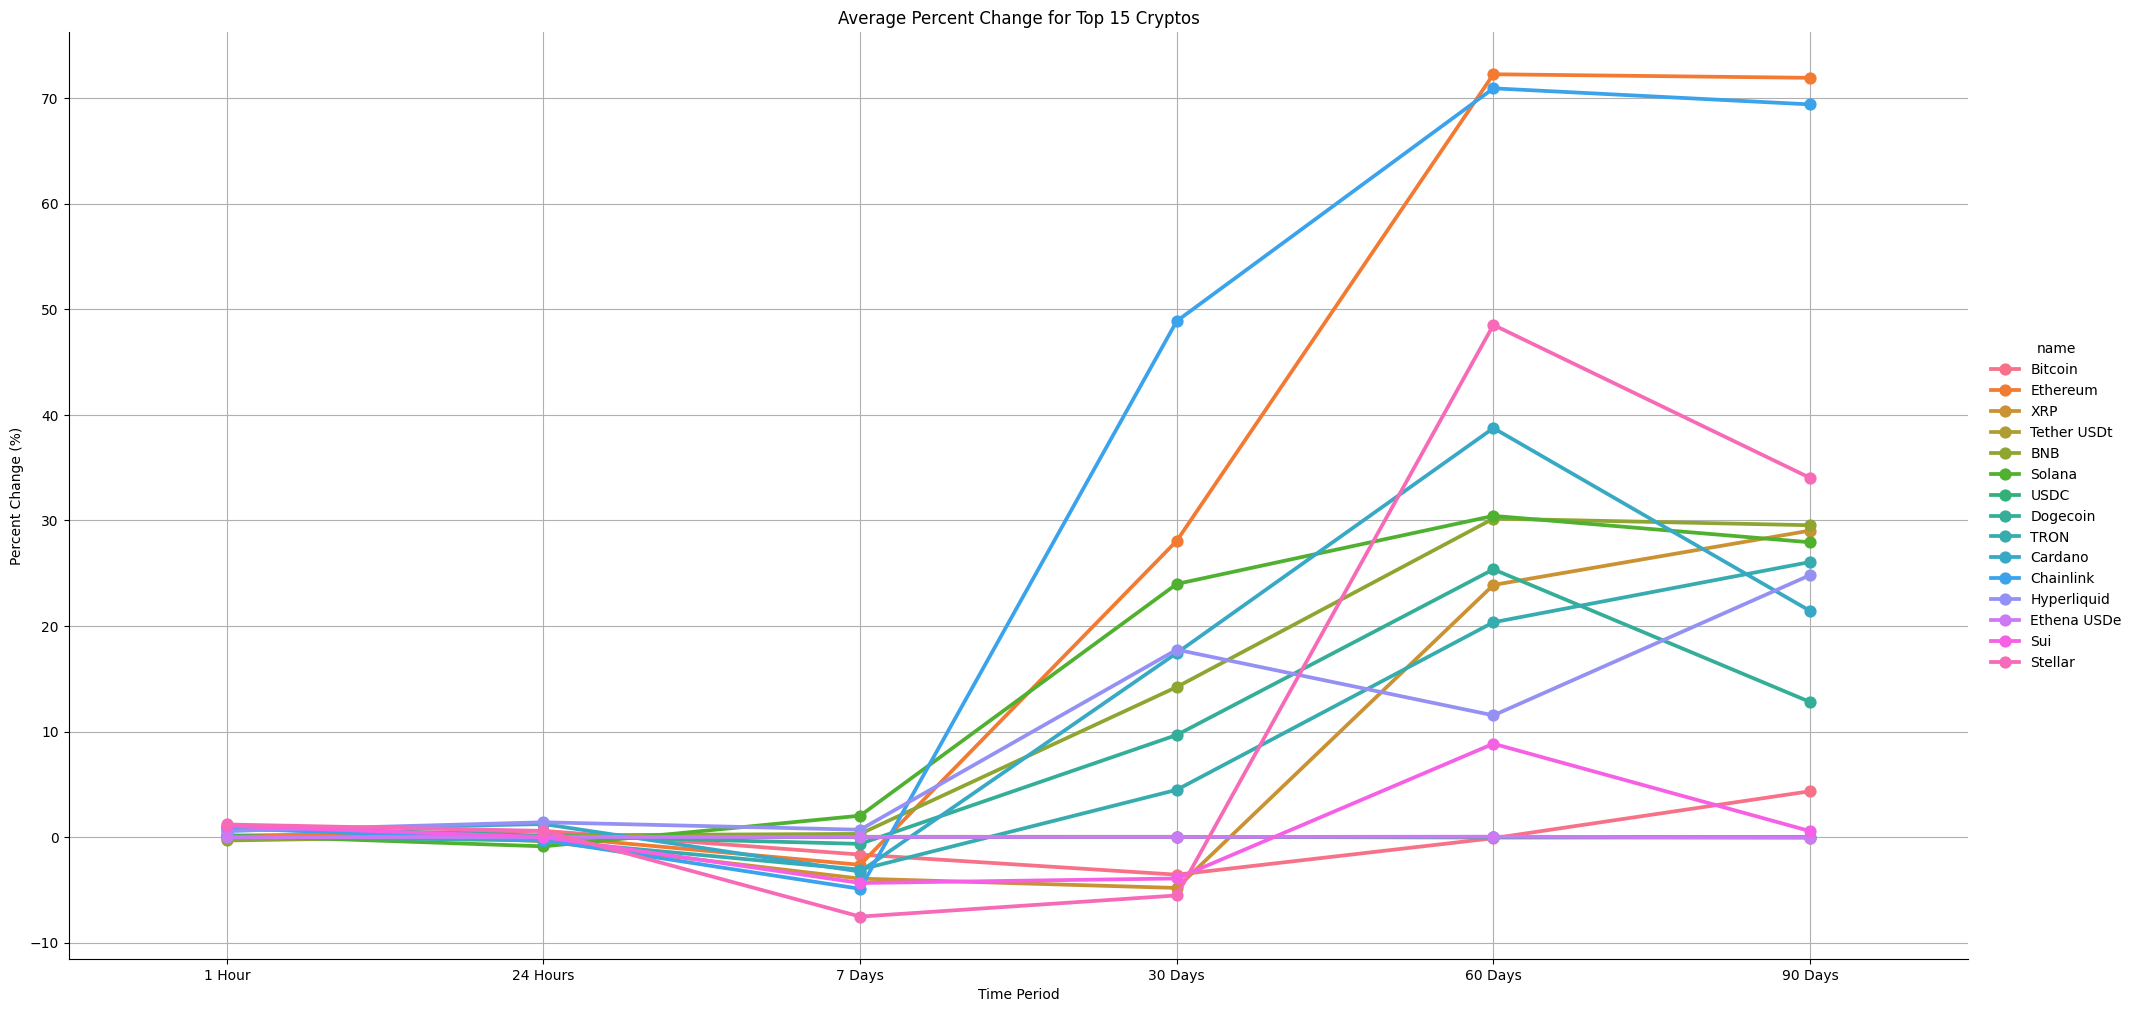

In [58]:
sns.catplot(x='percent_change', y='values', hue='name', data=stacked_df, height=10, aspect=2, kind='point')
plt.title('Average Percent Change for Top 15 Cryptos')
plt.xlabel('Time Period')
plt.ylabel('Percent Change (%)')
plt.grid()
plt.show()

In [ ]:
bitcoin_change = new_df[['name', 'quote.USD.price', 'timestamp']]
bitcoin_change = bitcoin_change[bitcoin_change['name'] == 'Bitcoin']
bitcoin_change

,name,quote.USD.price,timestamp
0,Bitcoin,109739.28795,2025-09-01 12:19:24.648149
5000,Bitcoin,109777.51070,2025-09-01 12:19:26.215854
10000,Bitcoin,109758.62739,2025-09-01 12:20:29.413283
15000,Bitcoin,109716.14784,2025-09-01 12:25:18.700454
20000,Bitcoin,109739.28795,2025-09-01 12:19:24.648149
25000,Bitcoin,109777.51070,2025-09-01 12:19:26.215854
30000,Bitcoin,109758.62739,2025-09-01 12:20:29.413283
35000,Bitcoin,109716.14784,2025-09-01 12:25:18.700454
40000,Bitcoin,109716.14784,2025-09-01 12:26:22.138589


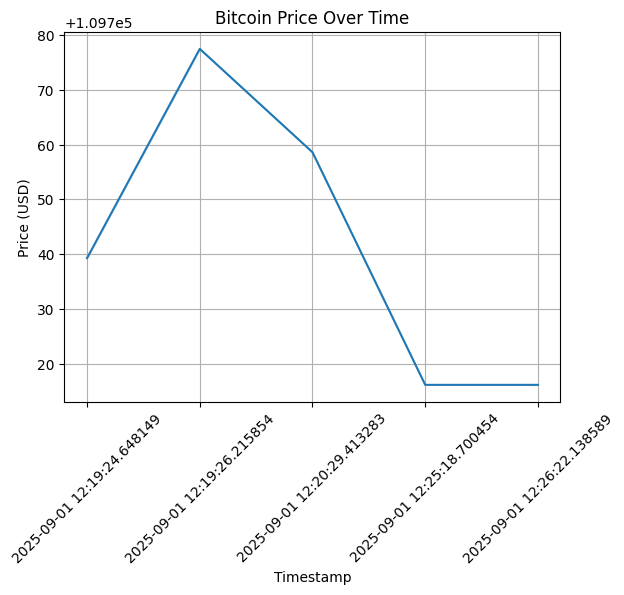

In [60]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=bitcoin_change)
plt.title('Bitcoin Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()